# **SVM Assignment 5**

**1) Run SVM algorithm on the loan dataset**

In [1]:
from seaborn.categorical import boxplot
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize


## Fetching Loan Dataset and using One-Hot Encoding on Categorical Columns for conversion in numeric values ##

loan = pd.read_excel('loan.xlsx',sheet_name='loan')
loan['Decision'] = loan['Decision'].replace(['accept','reject'],[1,0])
loan = pd.get_dummies(loan, columns=['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'])
loan.columns

Index(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance', 'Decision', 'Sex_F', 'Sex_M', 'Res_status_owner',
       'Res_status_rent', 'Telephone_given', 'Telephone_not_given',
       'Occupation_creative_', 'Occupation_driver', 'Occupation_executive',
       'Occupation_guard_etc', 'Occupation_labourer', 'Occupation_manager',
       'Occupation_office_st', 'Occupation_productio', 'Occupation_professio',
       'Occupation_sales', 'Occupation_semi_pro', 'Occupation_unemploye',
       'Job_status_governmen', 'Job_status_military', 'Job_status_private_s',
       'Job_status_retired', 'Job_status_self_empl', 'Job_status_student',
       'Job_status_unemploye', 'Liab_ref_f', 'Liab_ref_t', 'Acc_ref_given',
       'Acc_ref_oth_inst_'],
      dtype='object')

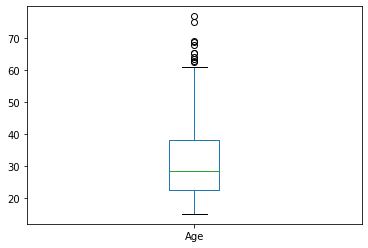

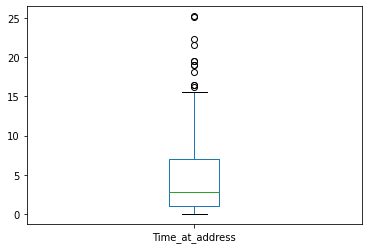

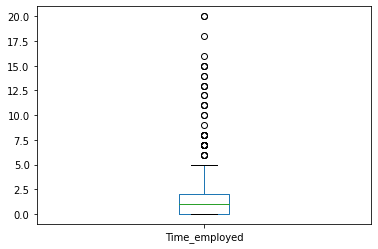

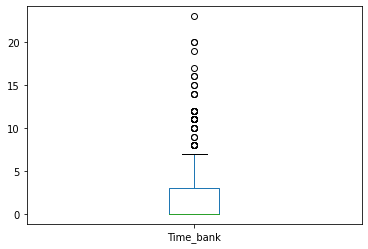

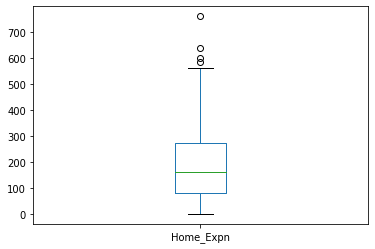

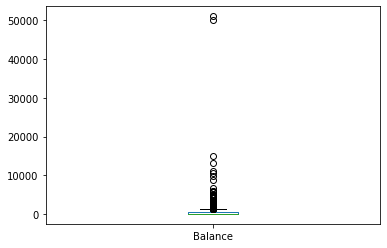

In [2]:
## Plotting Boxplot to identify outliers in each columns ##

def box_plot(loan, feature):
  loan.boxplot(column = feature)
  plt.grid(False)
  plt.show()
  
cols =['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance']

for col in cols:
  box_plot(loan, col)

In [3]:
## Defining outliers in each columns and removing them to pre-process data ##

def outlier(loan, feature):
  q1 = loan[feature].quantile(0.25)
  q3 = loan[feature].quantile(0.75)
  iqr = q3 - q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr

  out_index = loan.index[(loan[feature] < lb) | (loan[feature] > ub)]
  return out_index

out_list = []

for feature in cols:
  out_list.extend(outlier(loan, feature))

def out_exc(loan, out_list):
  outlist = sorted(set(out_list))
  loan = loan.drop(outlist)
  return loan

## Normalizing Dataset ##
loan = out_exc(loan, out_list)
loan_scaled = normalize(loan)
loan_scaled = pd.DataFrame(loan_scaled, columns=loan.columns)
loan_scaled

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_F,Sex_M,Res_status_owner,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,0.330299,0.003807,0.000000,0.000000,0.943712,0.000000,0.000000,0.000000,0.006508,0.006508,...,0.0,0.000000,0.0,0.000000,0.0,0.006508,0.006508,0.000000,0.006508,0.000000
1,0.138763,0.070545,0.000000,0.000000,0.987634,0.000000,0.000000,0.000000,0.007055,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.007055,0.007055,0.000000
2,0.982518,0.110084,0.086680,0.000000,0.000000,0.000000,0.043340,0.000000,0.043340,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.043340,0.000000,0.043340,0.000000
3,0.127035,0.056460,0.000000,0.000000,0.990223,0.000000,0.000000,0.000000,0.004343,0.004343,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.004343,0.000000,0.004343,0.000000
4,0.078704,0.001640,0.000000,0.004895,0.783123,0.616709,0.000000,0.004895,0.000000,0.004895,...,0.0,0.000000,0.0,0.000000,0.0,0.004895,0.004895,0.000000,0.004895,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.110856,0.008922,0.006489,0.000000,0.752667,0.648851,0.000000,0.000000,0.003244,0.003244,...,0.0,0.000000,0.0,0.003244,0.0,0.000000,0.000000,0.003244,0.003244,0.000000
305,0.079206,0.004450,0.010679,0.000000,0.996747,0.000000,0.000000,0.003560,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.003560,0.003560,0.000000,0.003560,0.000000
306,0.049894,0.003208,0.002139,0.000000,0.902502,0.427726,0.002139,0.000000,0.002139,0.002139,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002139,0.000000,0.002139,0.000000
307,0.067470,0.015390,0.006426,0.003213,0.257028,0.963854,0.003213,0.000000,0.003213,0.000000,...,0.0,0.003213,0.0,0.000000,0.0,0.000000,0.000000,0.003213,0.003213,0.000000


In [4]:
categ = loan.drop(['Decision'],axis=1)
dep = loan[['Decision']]

categ = np.array(categ)
dep = np.array(dep)

## Train Test Split to evaluate model ##
Cat_train, Cat_test, dep_train, dep_test = train_test_split(categ, dep, test_size = 0.2, random_state = 42)

In [5]:
## Fitting SVM Model with Linear Kernel and getting the accuracy score of the model ##
svc=SVC(kernel='linear')
svc.fit(Cat_train,dep_train)
dep_pred=svc.predict(Cat_test)
print('Linear Kernel Accuracy Score:',metrics.accuracy_score(dep_test,dep_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Kernel Accuracy Score: 0.6935483870967742


In [6]:
## Fitting SVM Model with RBF Kernel and getting the accuracy score of the model ##
svc=SVC(kernel='rbf')
svc.fit(Cat_train,dep_train)
dep_pred=svc.predict(Cat_test)
print('RBF Kernel Accuracy Score:',metrics.accuracy_score(dep_test,dep_pred))

RBF Kernel Accuracy Score: 0.5806451612903226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
## Fitting SVM Model with Polynomial Kernel and getting the accuracy score of the model ##
svc=SVC(kernel='poly')
svc.fit(Cat_train,dep_train)
dep_pred=svc.predict(Cat_test)
print('Poly Kernel Accuracy Score:',metrics.accuracy_score(dep_test,dep_pred))

Poly Kernel Accuracy Score: 0.5806451612903226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**2) Covert these two R codes (uploaded in the Files section) into Python and inspect the number of support vectors for three different values of the cost function: Number of Support Vectors 2.R and Number of Support Vectors.R**

**Number of Support Vectors.R**

No. of Support Vectors with CF 1: 113 



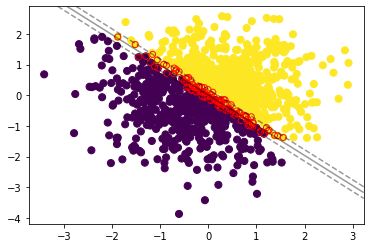

In [8]:
import pandas as pd
import numpy as np
from numpy.random import normal
from sklearn import metrics,svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Getting 1000 random points of data ##
x1 = normal(loc=0, scale=1, size=1000)
x2 = normal(loc=0, scale=1, size=1000)

X = np.stack((x1, x2), axis=1)

data = pd.DataFrame(x1, columns=["X"])
data["Y"] = x2

Z = []
for i in range(0,1000):
  if(x1[i] + x2[i] > 0):
    Z.append(int(1))
  else:
    Z.append(int(0))

data["Z"] = Z

## Fitting SVM Model with Linear kernel of random data points generated ##
model = svm.SVC(kernel='linear').fit(X,Z)
print("No. of Support Vectors with CF 1:",int(np.size(model.support_vectors_)/2),"\n")

## Plotting SVM Vectors with default cost function and margin ##
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=Z, s=50, cmap='viridis')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
a = np.linspace(xlim[0], xlim[1], 30)
b = np.linspace(ylim[0], ylim[1], 30)
A, B = np.meshgrid(a, b)
ab = np.vstack([A.ravel(), B.ravel()]).T
P = model.decision_function(ab).reshape(A.shape)
ax.contour(A, B, P, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--','-','--',])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],edgecolors='r', alpha =0.9, facecolor='None')

No. of Support Vectors with CF 10: 51 



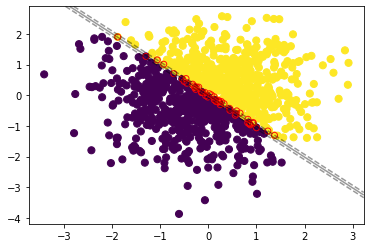

In [9]:
## Fitting SVM Model with Linear kernel of 10 cost function ##
model1 = svm.SVC(kernel='linear', C = 10).fit(X,Z)
print("No. of Support Vectors with CF 10:",int(np.size(model1.support_vectors_)/2),"\n")

## Plotting SVM Vectors with 10 cost function and margin ##
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=Z, s=50, cmap='viridis')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
a = np.linspace(xlim[0], xlim[1], 30)
b = np.linspace(ylim[0], ylim[1], 30)
A, B = np.meshgrid(a, b)
ab = np.vstack([A.ravel(), B.ravel()]).T
P = model1.decision_function(ab).reshape(A.shape)
ax.contour(A, B, P, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--','-','--',])
ax.scatter(model1.support_vectors_[:,0],model1.support_vectors_[:,1],edgecolors='r', alpha =0.9, facecolor='None')

No. of Support Vectors with CF 0.1: 230 



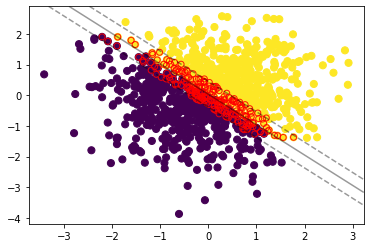

In [10]:
## Fitting SVM Model with Linear kernel of 0.1 cost function ##
model2 = svm.SVC(kernel='linear', C = 0.1).fit(X,Z)
print("No. of Support Vectors with CF 0.1:",int(np.size(model2.support_vectors_)/2),"\n")

## Plotting SVM Vectors with 0.1 cost function and margin ##
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=Z, s=50, cmap='viridis')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
a = np.linspace(xlim[0], xlim[1], 30)
b = np.linspace(ylim[0], ylim[1], 30)
A, B = np.meshgrid(a, b)
ab = np.vstack([A.ravel(), B.ravel()]).T
P = model2.decision_function(ab).reshape(A.shape)
ax.contour(A, B, P, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--','-','--',])
ax.scatter(model2.support_vectors_[:,0],model2.support_vectors_[:,1],edgecolors='r', alpha =0.9, facecolor='None')

**Number of Support Vectors 2.R**

No. of Support Vectors: 8 

[[1.  5.8]
 [3.5 3. ]
 [4.  4. ]
 [6.  1. ]
 [0.5 3.5]
 [2.  2. ]
 [3.  4. ]
 [3.5 1.2]] 



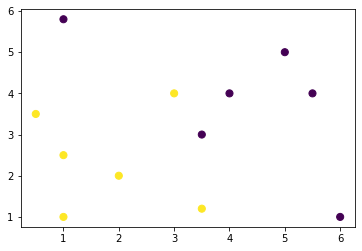

In [11]:
import pandas as pd
import numpy as np
from numpy.random import normal
from sklearn import metrics,svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt


x1s = [0.5,1,1,2,3,3.5,1,3.5,4,5,5.5,6]
x2s = [3.5,1,2.5,2,4,1.2,5.8,3,4,5,4,1]
ys = [1,1,1,1,1,1,-1,-1,-1,-1,-1,-1]

X = np.stack((x1s, x2s), axis=1)

data = pd.DataFrame(x1s, columns=["X1"])
data["X2"] = x2s
data["Type"] = ys

## Fitting SVM Model on the given points of data with cost function as 0.1 ##
model3 = svm.SVC(kernel='linear', C = 0.1).fit(X,ys)
plt.scatter(X[:,0], X[:,1], c=ys, s=50, cmap='viridis')
print("No. of Support Vectors:",int(np.size(model3.support_vectors_)/2),"\n")
print(model3.support_vectors_,"\n")

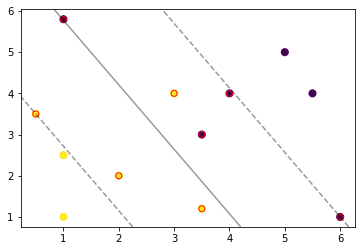

In [12]:
## Plotting Support vectors and showing the marginality of the data points ##
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=ys, s=50, cmap='viridis')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
a = np.linspace(xlim[0], xlim[1], 30)
b = np.linspace(ylim[0], ylim[1], 30)
A, B = np.meshgrid(a, b)
ab = np.vstack([A.ravel(), B.ravel()]).T
P = model3.decision_function(ab).reshape(A.shape)
ax.contour(A, B, P, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--','-','--',])
ax.scatter(model3.support_vectors_[:,0],model3.support_vectors_[:,1],edgecolors='r', alpha =0.9, facecolor='None')